In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv("dataCleaned.csv", index_col=0)
#df.drop(df.columns[0], axis=1, inplace=True)

# Formatting a specific float column to two decimal places
# List of columns to format
columns_to_format = ['GF_rolling', 'GA_rolling', 'win_rolling', 'draw_rolling', 'lose_rolling']
# Formatting multiple float columns to two decimal places
df[columns_to_format] = df[columns_to_format].applymap(lambda x: "{:.2f}".format(x))
df

,team_code,Opponent_code,season,Round_code,Venue_code,Referee_code,Formation_code,Day_code,GF_rolling,GA_rolling,win_rolling,draw_rolling,lose_rolling,Result_code
3,0,5,2010,32,1,41,19,5,3.00,0.67,0.67,0.33,0.00,2
4,0,31,2010,33,0,35,12,5,4.00,0.67,1.00,0.00,0.00,0
5,0,35,2010,34,1,25,12,5,2.33,1.00,0.67,0.33,0.00,1
6,0,11,2010,35,0,27,19,6,2.33,1.67,0.33,0.33,0.33,1
7,0,2,2010,36,1,24,19,5,1.00,2.00,0.00,0.33,0.67,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9875,38,8,2022,27,0,9,18,5,1.67,0.67,0.67,0.00,0.33,1
9876,38,1,2022,28,1,41,18,5,1.00,2.67,0.33,0.00,0.67,2
9877,38,21,2022,29,0,13,18,5,1.00,2.00,0.67,0.00,0.33,1
9878,38,13,2022,30,1,9,18,5,0.33,2.67,0.33,0.00,0.67,0


In [43]:
#Season 2022 bo7do
DataDV = df[df["season"]>=2022]
DataDV.shape

(757, 14)

In [44]:
DataDV.head()

,team_code,Opponent_code,season,Round_code,Venue_code,Referee_code,Formation_code,Day_code,GF_rolling,GA_rolling,win_rolling,draw_rolling,lose_rolling,Result_code
9120,0,12,2022,0,0,2,16,4,1.67,2.00,0.33,0.00,0.67,2
9121,0,18,2022,11,1,8,16,5,2.33,1.00,0.67,0.00,0.33,2
9122,0,6,2022,22,0,6,16,5,3.67,1.00,1.00,0.00,0.00,2
9123,0,14,2022,32,1,12,16,5,3.00,0.67,1.00,0.00,0.00,2
9124,0,1,2022,33,1,37,16,2,3.00,1.00,1.00,0.00,0.00,2


In [78]:
# import seaborn as sns

# sns.heatmap(DataDV.pivot_table(values="GF_rolling", index="Round_code", columns="Opponent_code"), annot=True)
# plt.title("Goals Scored against Different Opponents in Each Round")
# plt.show()

#Hadi Matrice de correlation makayan lach n3awdoha hena deja kayna ffeature selection



### ***Team By Result (Win, lose)***

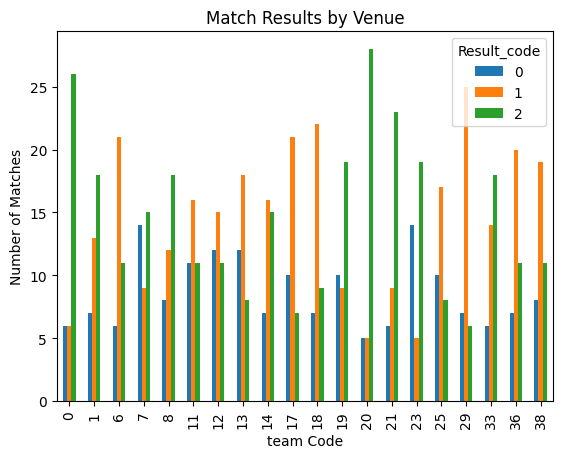

In [46]:
#Ajouté : Hadi fiha kol far9a wach tatrba7 ktar ola tatkhsar ktar....
DataDV.groupby(["team_code", "Result_code"]).size().unstack().plot(kind="bar")
plt.xlabel("team Code")
plt.ylabel("Number of Matches")
plt.title("Match Results by Venue")
plt.show()

In [80]:
# #Lbyota litaymarkiw lfra9i fkol matchs
# plt.scatter(DataDV["team_code"], DataDV["GF_rolling"])
# plt.xlabel("Team")
# plt.ylabel("Goals For (Rolling Average)")
# plt.title("Goals Scored per Round in 2022 Season")
# plt.show()

#Hada makayan lach mawada7ach mzn

In [82]:
#Tahada nfs Lblan

# plt.scatter(DataDV["GF_rolling"], DataDV["win_rolling"])
# plt.xlabel("Goals Scored")
# plt.ylabel("Win Percentage (Rolling Average)")
# plt.title("Relationship between Goals Scored and Win Percentage")
# plt.show()


In [83]:
# import seaborn as sns

# sns.catplot(
#     x="Venue_code",
#     y="Result_code",
#     #hue="Opponent_code", and Opponent
#     kind="bar",
#     data=DataDV
# )
# plt.title("Win Probability by Venue")
# plt.show()


In [84]:
# x_data = DataDV['team_code']
# y_data = DataDV['Result_code']

# # Create the line plot
# plt.plot(x_data, y_data)

# # Add labels and title (replace with your desired labels)
# plt.xlabel('X-axis team_code')
# plt.ylabel('Y-axis Result_code')
# plt.title('Line Graph Title')

Text(0.5, 1.0, 'Boxplot of Referee Code by Result Code')

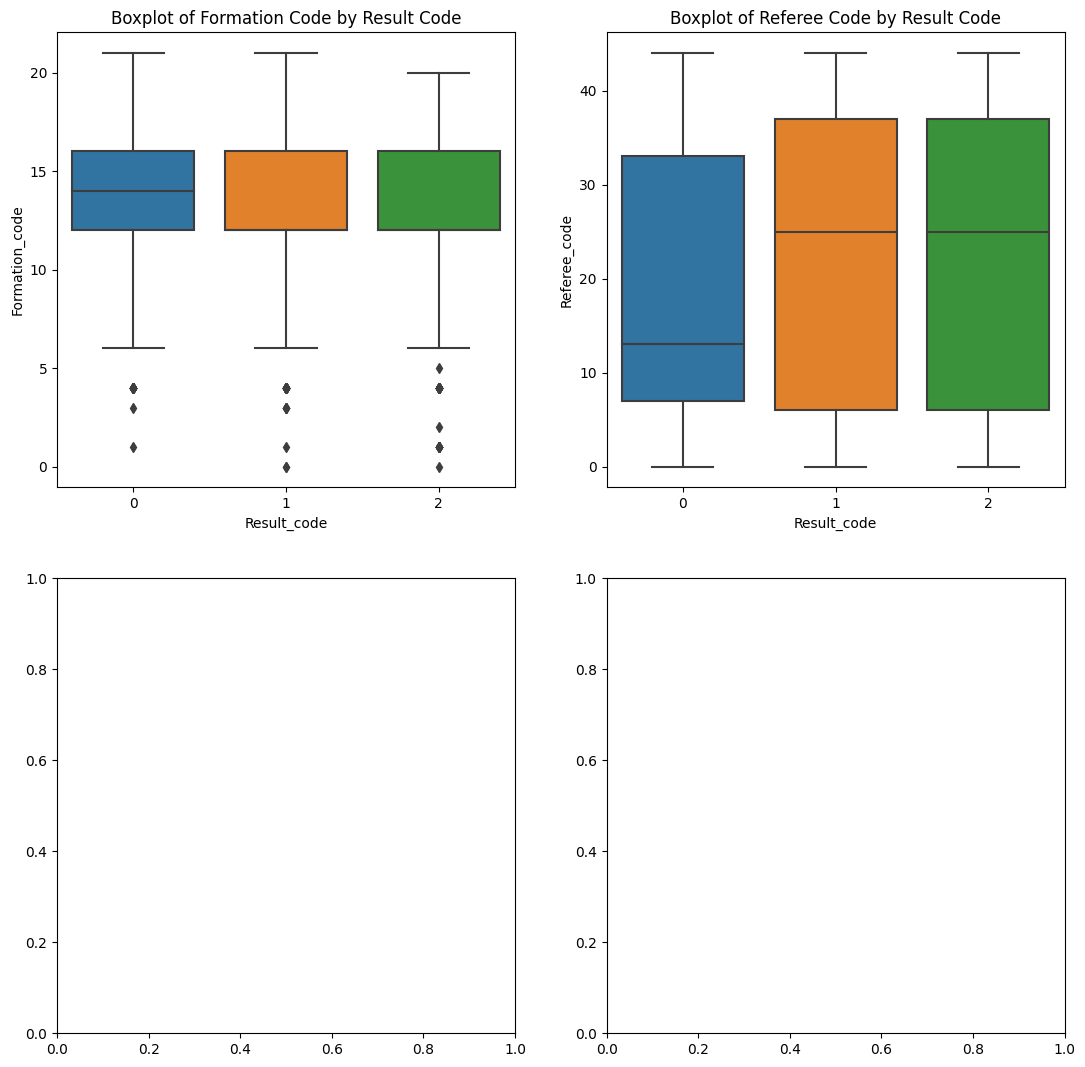

In [75]:
# Additional visualizations
# Creating a larger figure for additional plots
fig, axes = plt.subplots(2, 2, figsize=(13, 13))

# Boxplots for analyzing distributions and outliers
sns.boxplot(x='Result_code', y='Formation_code', data=DataDV, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Formation Code by Result Code')

sns.boxplot(x='Result_code', y='Referee_code', data=DataDV, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Referee Code by Result Code')

#Bnesba LSTART,Pie Chart rah darro houssam makayan lach Ri Redondance

### *** ***